# Image Hashing on Face Dataset

## Import Libraries

In [29]:
import cv2
import numpy as np
import scipy

import zipfile
import matplotlib.pyplot as plt

## Implement helper functions to convert binary to hex etc. 

In [30]:
def hash_array_to_hash_hex(hash_array):
  # convert hash array of 0 or 1 to hash string in hex
  hash_array = np.array(hash_array, dtype = np.uint8)
  hash_str = ''.join(str(i) for i in 1 * hash_array.flatten())
  return (hex(int(hash_str, 2)))


def hash_hex_to_hash_array(hash_hex):
  # convert hash string in hex to hash values of 0 or 1
  # The int in Python is a built-in method that converts a string or a number into an integer. 
  # We can also use int in Python to convert binary numbers to decimal numbers, 
  # hexadecimal numbers to decimal numbers, 
  # and octal numbers into decimal numbers.
  # Syntax: int(number, base)
  hash_str = int(hash_hex, 16)

  # bin() is an in-built function in Python that takes in integer x 
  # and returns the binary representation of x in a string format 
  array_str = bin(hash_str)[2:]
  return np.array([i for i in array_str], dtype = np.float32)


# Read Images from the Face Dataset

In [31]:
# Read facial images from the zip file

faces = {}

with zipfile.ZipFile('train_faces.zip') as facezip:
  for filename in facezip.namelist():
    if not filename.endswith('.pgm'):
      continue # not a face image
    with facezip.open(filename) as image:
      faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8),cv2.IMREAD_GRAYSCALE )  



## Display some images

Showing sample faces


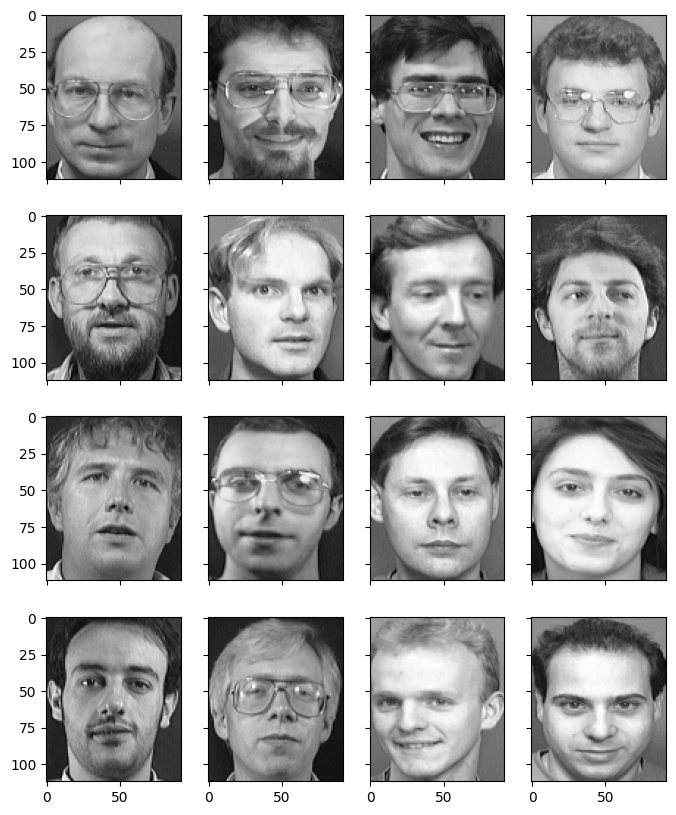

In [32]:
fig, axes = plt.subplots(4,4, sharex=True, sharey=True, figsize=(8,10))
faceimages = list(faces.values())[-16:]
for i in range(16):
  axes[i%4][i//4].imshow(faceimages[i], cmap='gray')

print('Showing sample faces')
plt.show()


In [33]:
faceshape = list(faces.values())[0].shape

print('Face image shape : ', faceshape)

print('Number of images : ', len(faces))

Face image shape :  (112, 92)
Number of images :  20


In [34]:
faces.keys()

dict_keys(['train_faces/s1.pgm', 'train_faces/s10.pgm', 'train_faces/s11.pgm', 'train_faces/s12.pgm', 'train_faces/s13.pgm', 'train_faces/s14.pgm', 'train_faces/s15.pgm', 'train_faces/s16.pgm', 'train_faces/s17.pgm', 'train_faces/s18.pgm', 'train_faces/s19.pgm', 'train_faces/s2.pgm', 'train_faces/s20.pgm', 'train_faces/s3.pgm', 'train_faces/s4.pgm', 'train_faces/s5.pgm', 'train_faces/s6.pgm', 'train_faces/s7.pgm', 'train_faces/s8.pgm', 'train_faces/s9.pgm'])

# Create a knowledgebase of all the images (compute the phash of the images)

In [35]:

# Hash dictionary to store hash values of images
face_image_hash_dict = {}

face_image_bin_dict = {}

# for every image calculate pHash

for key in list(faces.keys()):
  img = faces[key]
  img = np.array(img, dtype=np.float32)

  # Calculate DCT of the image
  dct = cv2.dct(img)

  dct_block = dct[:8, :8]

  dct_average = (dct_block.mean()*  dct_block.size - dct_block[0, 0]) / (dct_block.size -1)

  # Convert the DCt block to binary values based on dct_average
  dct_block[dct_block < dct_average] = 0.0
  dct_block[dct_block != 0] = 1.0

  # image binary hash
  face_image_bin_dict[key] = dct_block.flatten() # 64 binary bits (image hash)


  # store the image hash
  face_image_hash_dict[key] = hash_array_to_hash_hex(dct_block.flatten()) # 16 digit hex number => image hash




In [36]:
face_image_hash_dict # KB

{'train_faces/s1.pgm': '0xd47c077f2f6754ff',
 'train_faces/s10.pgm': '0xc03f2bf5793df5c6',
 'train_faces/s11.pgm': '0xc00f3f777c0df4c7',
 'train_faces/s12.pgm': '0xd0ed2a233d2bb5d3',
 'train_faces/s13.pgm': '0xd28f0bbf2c3b9dc9',
 'train_faces/s14.pgm': '0xc4c11b07ff0f377d',
 'train_faces/s15.pgm': '0xc1395e267f097f96',
 'train_faces/s16.pgm': '0x919d4e3a7e6965af',
 'train_faces/s17.pgm': '0x958f7e677b387597',
 'train_faces/s18.pgm': '0x95b97aed7b07659d',
 'train_faces/s19.pgm': '0xd0cd437b6f2f3ffb',
 'train_faces/s2.pgm': '0xc7b90a7d7f3ff49e',
 'train_faces/s20.pgm': '0xd12f7eede9c5d59e',
 'train_faces/s3.pgm': '0x81947e6e6b2dc5cc',
 'train_faces/s4.pgm': '0x870e3e677961e4c6',
 'train_faces/s5.pgm': '0xd2f13839275cf5cf',
 'train_faces/s6.pgm': '0x906f7abbfc97c14a',
 'train_faces/s7.pgm': '0x857b3bf575deffdb',
 'train_faces/s8.pgm': '0xc02f2bb73d30b6d3',
 'train_faces/s9.pgm': '0xc10f7f297997d5d8'}

# Test - Image Matching (image searching with hashes)

## Read a Query Image

In [45]:
#test_image = open('s14_10.pgm', 'rb')
# test_image = open('s20_10.pgm', 'rb')
test_image = open('s_21.pgm', 'rb')


test_image = cv2.imdecode(np.frombuffer(test_image.read(), np.uint8),cv2.IMREAD_GRAYSCALE )  
img = np.array(test_image, dtype=np.float32)
dct = cv2.dct(img)
dct_block = dct[:8, :8]
dct_average = (dct_block.mean()*  dct_block.size - dct_block[0, 0]) / (dct_block.size -1)

# Convert the DCt block to binary values based on dct_average
dct_block[dct_block < dct_average] = 0.0
dct_block[dct_block != 0] = 1.0

# image binary hash
test_image_bin_hash = dct_block.flatten() # 64 binary bits (image hash)
print(test_image_bin_hash)

# store the image hash
test_image_hash = hash_array_to_hash_hex(dct_block.flatten())
print(test_image_hash)

[1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1.]
0xc56f7e753954c69d


# Compute distance of the test hash with other Hashes in the KB

In [46]:
for key in face_image_hash_dict.keys():
  distance = scipy.spatial.distance.hamming(
    hash_hex_to_hash_array(face_image_hash_dict[key]), 
    hash_hex_to_hash_array(test_image_hash)
    )
  print("{0:<25} {1}".format(key, distance))

train_faces/s1.pgm        0.390625
train_faces/s10.pgm       0.359375
train_faces/s11.pgm       0.328125
train_faces/s12.pgm       0.453125
train_faces/s13.pgm       0.515625
train_faces/s14.pgm       0.484375
train_faces/s15.pgm       0.40625
train_faces/s16.pgm       0.484375
train_faces/s17.pgm       0.3125
train_faces/s18.pgm       0.328125
train_faces/s19.pgm       0.53125
train_faces/s2.pgm        0.375
train_faces/s20.pgm       0.265625
train_faces/s3.pgm        0.40625
train_faces/s4.pgm        0.3125
train_faces/s5.pgm        0.421875
train_faces/s6.pgm        0.421875
train_faces/s7.pgm        0.3125
train_faces/s8.pgm        0.328125
train_faces/s9.pgm        0.296875
